In [1]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

In [2]:
sim1 = pd.read_csv("sim1.csv")

In [3]:
sim1

,x,y
0,1,4.20
1,1,7.51
2,1,2.13
...,...,...
27,10,24.97
28,10,23.35
29,10,21.98


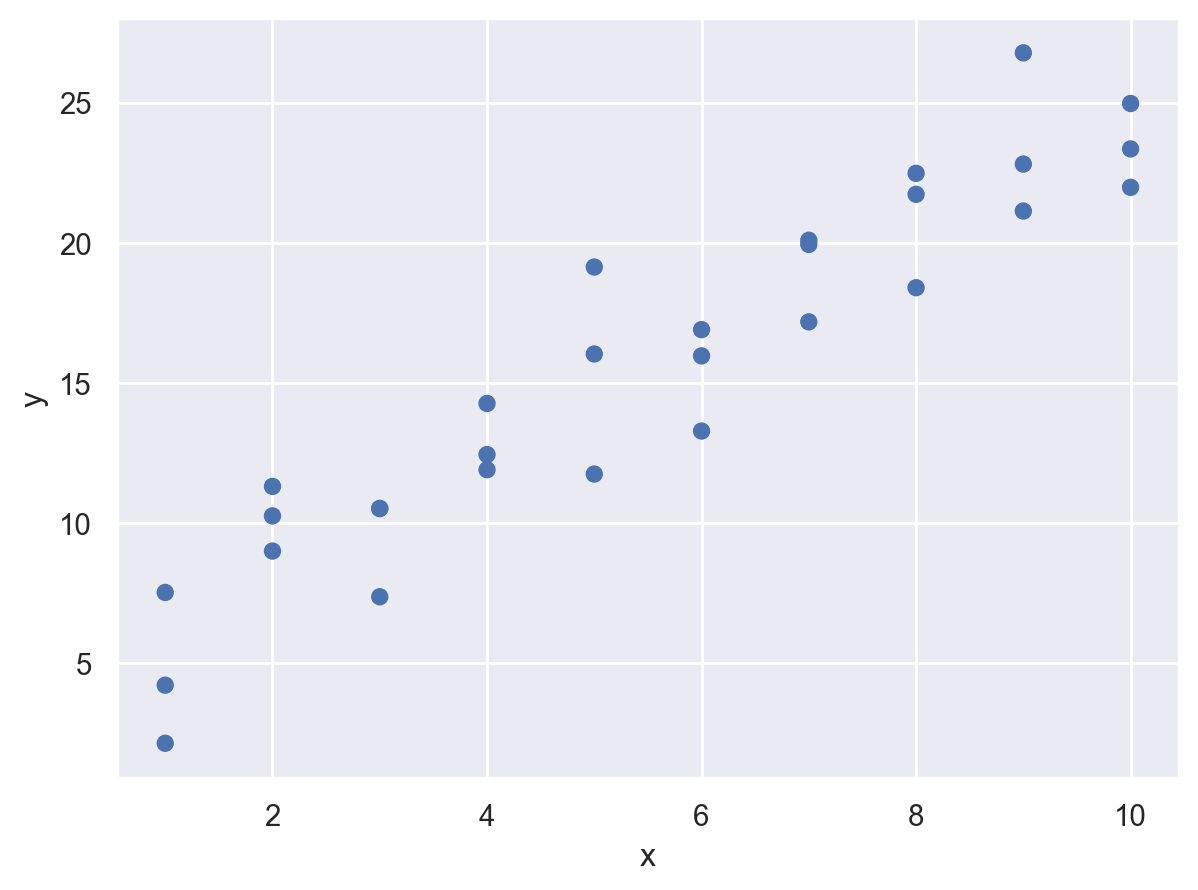

In [7]:
(
  so.Plot(sim1, x ='x', y = 'y')
  .add(so.Dot())
)

In [8]:
from statsmodels.formula.api import ols

mod = ols('y ~ x', data=sim1).fit()
display(mod.summary().tables[0], mod.summary().tables[1])

Dep. Variable:,y,R-squared:,0.885
Model:,OLS,Adj. R-squared:,0.880
Method:,Least Squares,F-statistic:,214.7
Date:,"Thu, 30 May 2024",Prob (F-statistic):,1.17e-14
Time:,23:22:24,Log-Likelihood:,-65.226
No. Observations:,30,AIC:,134.5
Df Residuals:,28,BIC:,137.3
Df Model:,1,,
Covariance Type:,nonrobust,,


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,4.2208,0.869,4.858,0.000,2.441,6.001
x,2.0515,0.140,14.651,0.000,1.765,2.338


In [9]:
from statsmodels.tools.eval_measures import rmse, meanabs
ypred = mod.predict(sim1)
y = sim1["y"]

print(f"RMSE = {rmse(y, ypred):.2f} \nMAE = {meanabs(y, ypred):.2f} \nR-squared = {mod.rsquared:.2f}")

RMSE = 2.13 
MAE = 1.71 
R-squared = 0.88


In [10]:
from statsmodels.formula.api import ols
sim1_mod = ols("y ~ x", data = sim1)

sim1_mod.fit().params  # 모델의 parameter 즉, coefficients를 내줌
# Intercept   4.22
# x           2.05     # 위에서 구한 파라미터값과 동일함

Intercept   4.22
x           2.05
dtype: float64

In [ ]:
houses = sm.datasets.get_rdataset("SaratogaHouses", "mosaicData").data
houses.head(3)

In [ ]:
from statsmodels.formula.api import ols

houses["livingArea2"] = houses["livingArea"] / 35.5
mod_houses = ols("price ~ livingArea2 + bedrooms", data=houses).fit()
mod_houses.params